In [3]:
import pandas as pd

df = pd.read_csv('linkdin_Job_data.csv')

In [4]:
print(df.isnull().sum())

job_ID                   0
job                     33
location                33
company_id            7927
company_name            35
work_type              191
full_time_remote        79
no_of_employ           324
no_of_application       40
posted_day_ago           7
alumni                3069
Hiring_person         2207
linkedin_followers    3113
hiring_person_link    2207
job_details             46
Column1               7927
dtype: int64


In [5]:
df = df.drop(columns=['hiring_person_link', 'job_details', 'Column1'])

In [6]:
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['company_name'] = df['company_name'].fillna(df['company_name'].mode()[0])
df['work_type'] = df['work_type'].fillna(df['work_type'].mode()[0])


In [7]:
import re

def extract_avg_employees(text):
    if isinstance(text, str):
        # Extract the numbers from the string using regex
        numbers = re.findall(r'\d+', text.replace(',', ''))
        if len(numbers) == 2:  # If it's a range like '1,001-5,000'
            return (int(numbers[0]) + int(numbers[1])) / 2
        elif len(numbers) == 1:  # If there's only one number like '10,001+'
            return int(numbers[0])
    return None

df['no_of_employ_numeric'] = df['no_of_employ'].apply(extract_avg_employees)

df['no_of_employ_numeric'] = df['no_of_employ_numeric'].fillna(df['no_of_employ_numeric'].median())

df['no_of_application'] = pd.to_numeric(df['no_of_application'], errors='coerce')
df['no_of_application'] = df['no_of_application'].fillna(df['no_of_application'].median())

df['linkedin_followers'] = pd.to_numeric(df['linkedin_followers'], errors='coerce')
df['linkedin_followers'] = df['linkedin_followers'].fillna(df['linkedin_followers'].median())

df = df.drop(columns=['no_of_employ'])



In [8]:
df['no_of_employ_numeric'] = df['no_of_employ_numeric'].fillna(df['no_of_employ_numeric'].median())

df['no_of_application'] = pd.to_numeric(df['no_of_application'], errors='coerce')
df['no_of_application'] = df['no_of_application'].fillna(df['no_of_application'].median())

df['linkedin_followers'] = pd.to_numeric(df['linkedin_followers'], errors='coerce')
df['linkedin_followers'] = df['linkedin_followers'].fillna(df['linkedin_followers'].median())



In [9]:
df['alumni'] = df['alumni'].fillna('Unknown')
df['Hiring_person'] = df['Hiring_person'].fillna('Unknown')

In [10]:
import numpy as np

def convert_to_days(value):
    if 'hour' in value:
        return 1 / 24  # Treat 1 hour as 1/24 of a day
    elif 'day' in value:
        return int(value.split()[0])  # Extract the numeric part for days
    elif 'week' in value:
        return int(value.split()[0]) * 7  # Convert weeks to days
    else:
        return np.nan  # Return NaN for any unrecognized format

df['posted_day_ago_numeric'] = df['posted_day_ago'].apply(lambda x: convert_to_days(str(x)))

df['posted_day_ago_numeric'] = df['posted_day_ago_numeric'].fillna(df['posted_day_ago_numeric'].median())

df = df.drop(columns=['posted_day_ago'])


In [11]:
print(df.isnull().sum())

job_ID                       0
job                          0
location                     0
company_id                7927
company_name                 0
work_type                    0
full_time_remote            79
no_of_application            0
alumni                       0
Hiring_person                0
linkedin_followers        7927
no_of_employ_numeric         0
posted_day_ago_numeric       0
dtype: int64


In [12]:
df['linkedin_followers'] = df['linkedin_followers'].fillna(df['linkedin_followers'].median())

df['full_time_remote'] = df['full_time_remote'].fillna(df['full_time_remote'].mode()[0])

In [13]:
print(df.isnull().sum())

job_ID                       0
job                          0
location                     0
company_id                7927
company_name                 0
work_type                    0
full_time_remote             0
no_of_application            0
alumni                       0
Hiring_person                0
linkedin_followers        7927
no_of_employ_numeric         0
posted_day_ago_numeric       0
dtype: int64


In [14]:
import matplotlib.pyplot as plt

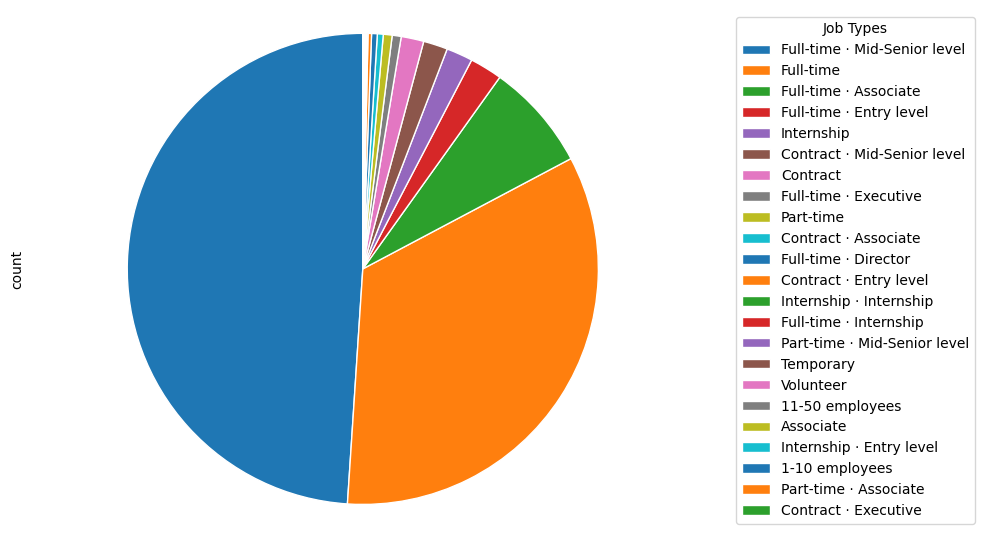

In [26]:
remote_jobs = df['full_time_remote'].value_counts()  

plt.figure(figsize=(10, 6))  

labels = remote_jobs.index  

remote_jobs.plot(kind='pie', 
                 labels=None,  
                 autopct=None,  
                 startangle=90, 
                 pctdistance=0.85, 
                 wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  


plt.legend(labels, title="Job Types", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axis('equal')  
plt.tight_layout()  
plt.show()


In [28]:
import seaborn as sns


C:\Users\Arun\AppData\Local\Temp\ipykernel_13360\1541167053.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=application_count, x='work_type', y='no_of_application', palette='viridis')


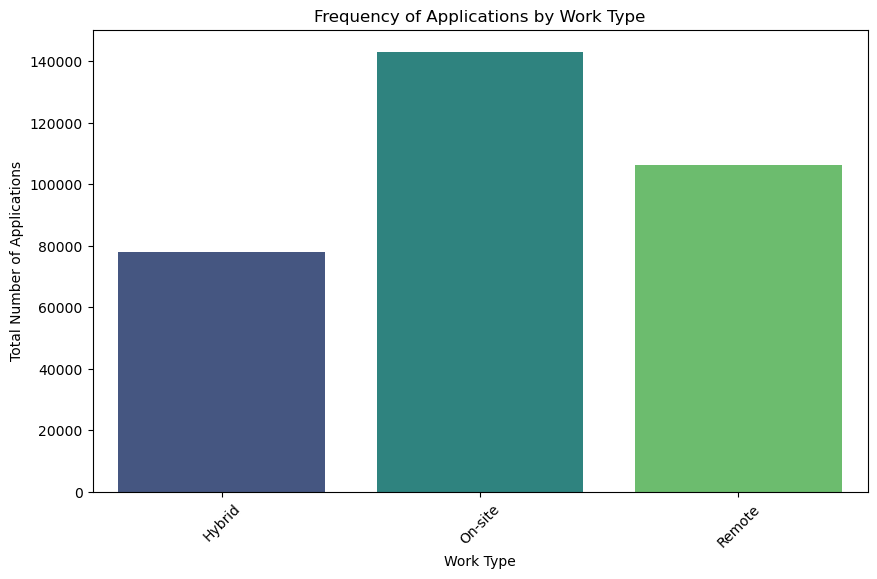

In [42]:
application_count = df.groupby('work_type')['no_of_application'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=application_count, x='work_type', y='no_of_application', palette='viridis')

plt.title('Frequency of Applications by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Total Number of Applications')
plt.xticks(rotation=45)  
plt.show()


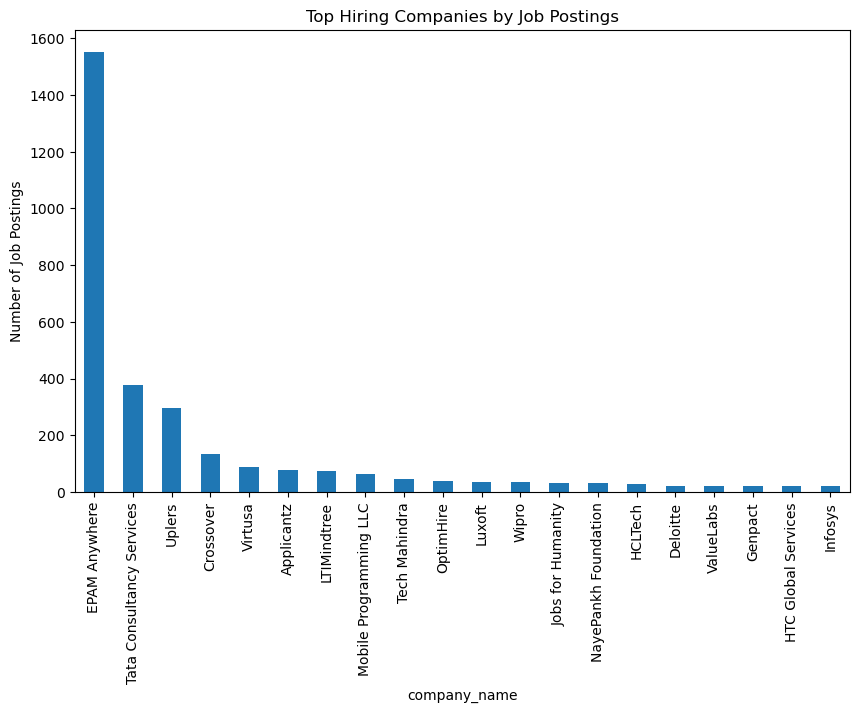

In [44]:
top_companies = df['company_name'].value_counts().nlargest(20)

top_companies.plot(kind='bar', figsize=(10,6), title='Top Hiring Companies by Job Postings')
plt.ylabel('Number of Job Postings')
plt.show()


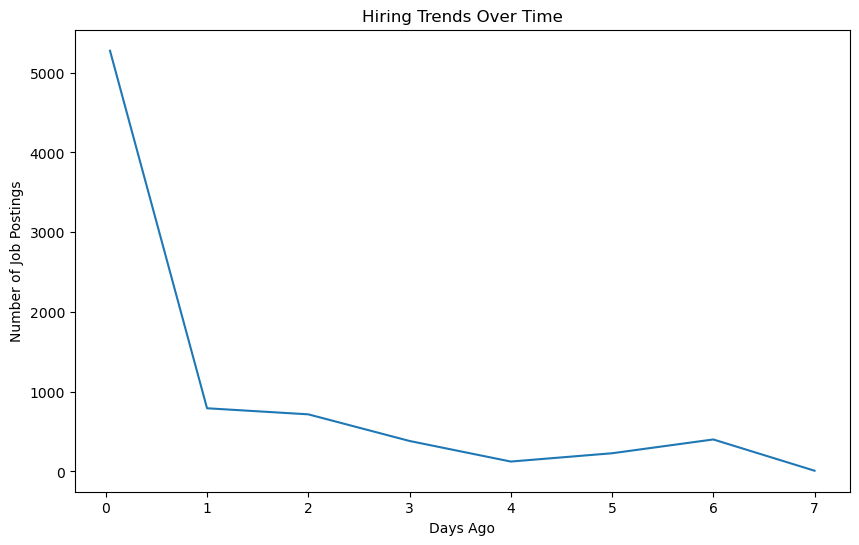

In [38]:
df.groupby('posted_day_ago_numeric')['job_ID'].count().plot(kind='line', figsize=(10,6), title='Hiring Trends Over Time')
plt.ylabel('Number of Job Postings')
plt.xlabel('Days Ago')
plt.show()


C:\Users\Arun\AppData\Local\Temp\ipykernel_13360\3896795127.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies, x='no_of_employ_numeric', y='company_name', palette='viridis')


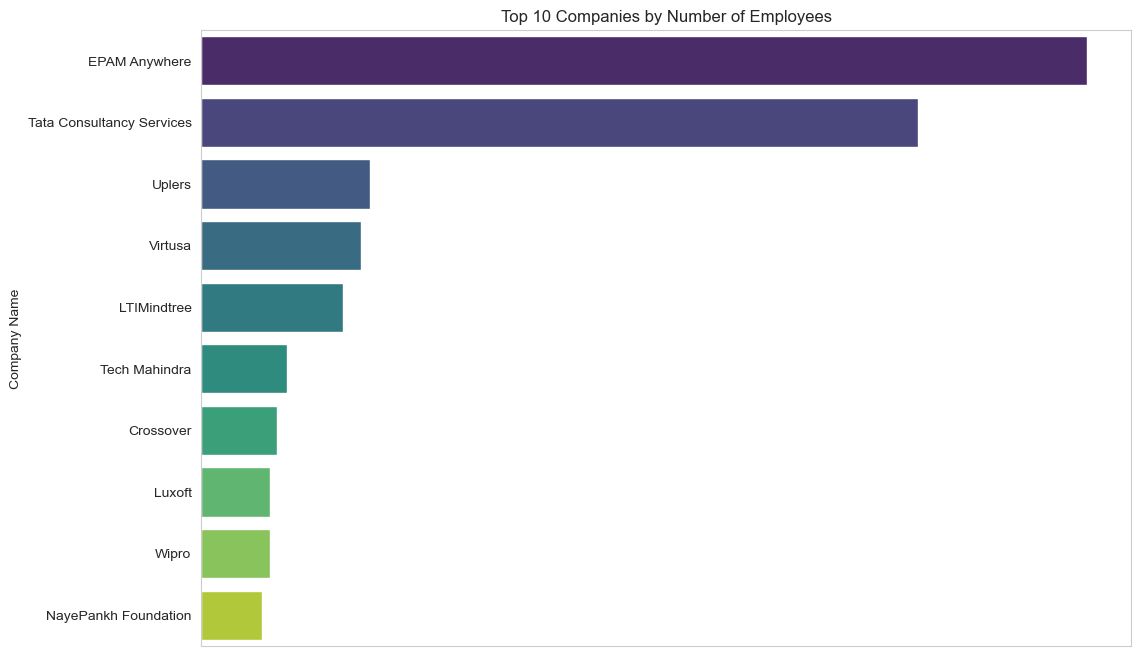

In [55]:
top_companies = df.groupby('company_name')['no_of_employ_numeric'].sum().reset_index()

top_n = 10  
top_companies = top_companies.sort_values(by='no_of_employ_numeric', ascending=False).head(top_n)

plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(data=top_companies, x='no_of_employ_numeric', y='company_name', palette='viridis')


plt.title(f'Top {top_n} Companies by Number of Employees')
plt.xlabel('Number of Employees')

plt.xticks([])  
plt.gca().axes.get_xaxis().set_visible(False)  

plt.ylabel('Company Name')  
plt.show()


C:\Users\Arun\AppData\Local\Temp\ipykernel_13360\909050499.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_job_counts, x='job_count', y='location', palette='viridis')


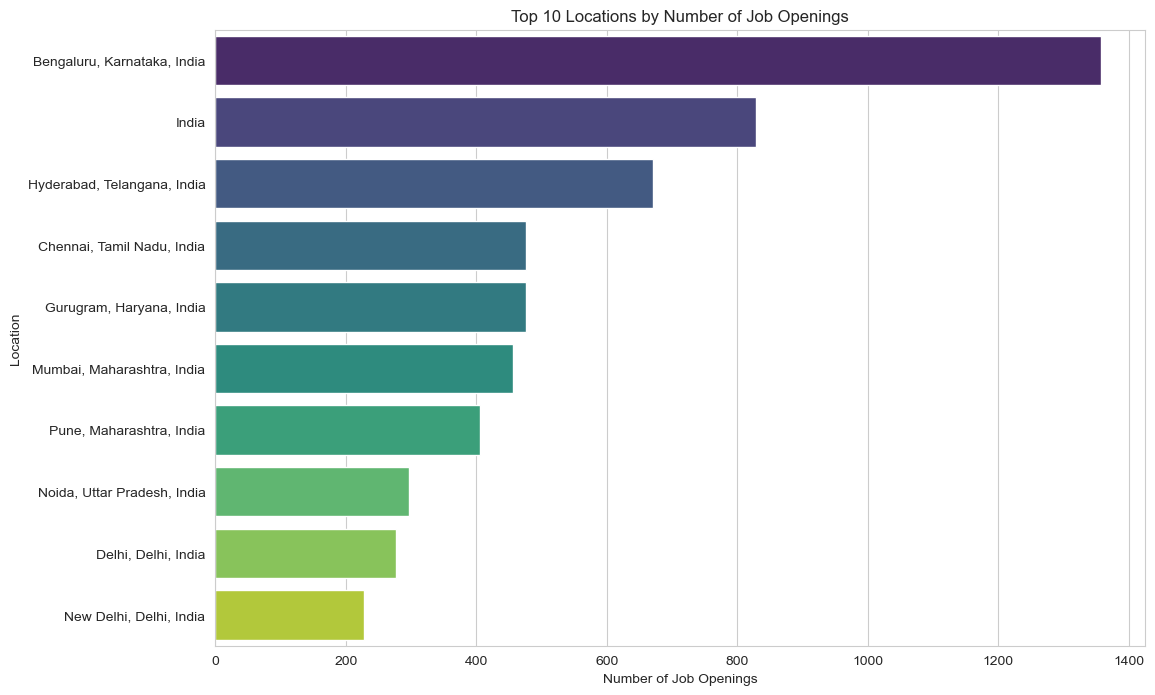

In [59]:
job_counts_by_location = df['location'].value_counts().reset_index()
job_counts_by_location.columns = ['location', 'job_count']

top_n = 10  
top_job_counts = job_counts_by_location.head(top_n)

plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(data=top_job_counts, x='job_count', y='location', palette='viridis')

plt.title(f'Top {top_n} Locations by Number of Job Openings')
plt.xlabel('Number of Job Openings')
plt.ylabel('Location')
plt.show()


C:\Users\Arun\AppData\Local\Temp\ipykernel_13360\4137252649.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jobs, x='no_of_application', y='job', palette='viridis')


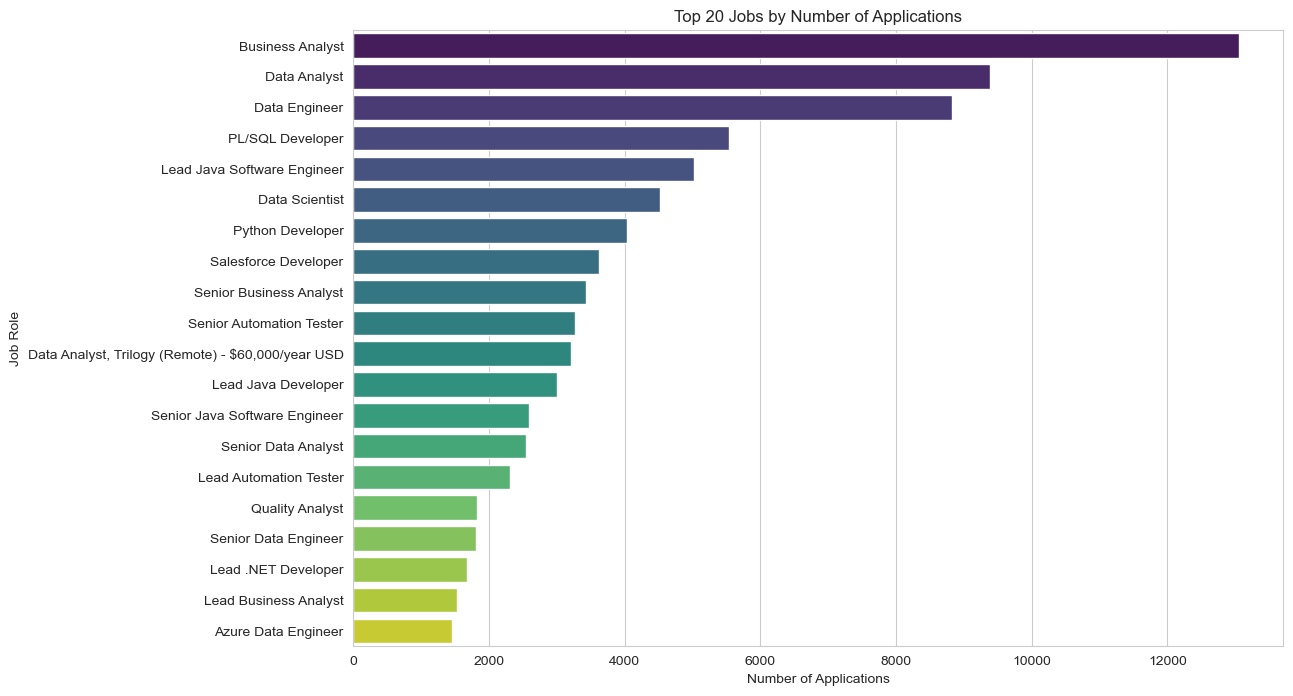

In [63]:
job_application_counts = df.groupby('job')['no_of_application'].sum().reset_index()

top_jobs = job_application_counts.sort_values(by='no_of_application', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(data=top_jobs, x='no_of_application', y='job', palette='viridis')

plt.title('Top 20 Jobs by Number of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Job Role')
plt.show()


C:\Users\Arun\AppData\Local\Temp\ipykernel_13360\3130697247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=work_type_counts, x='company_count', y='work_type', palette='viridis')


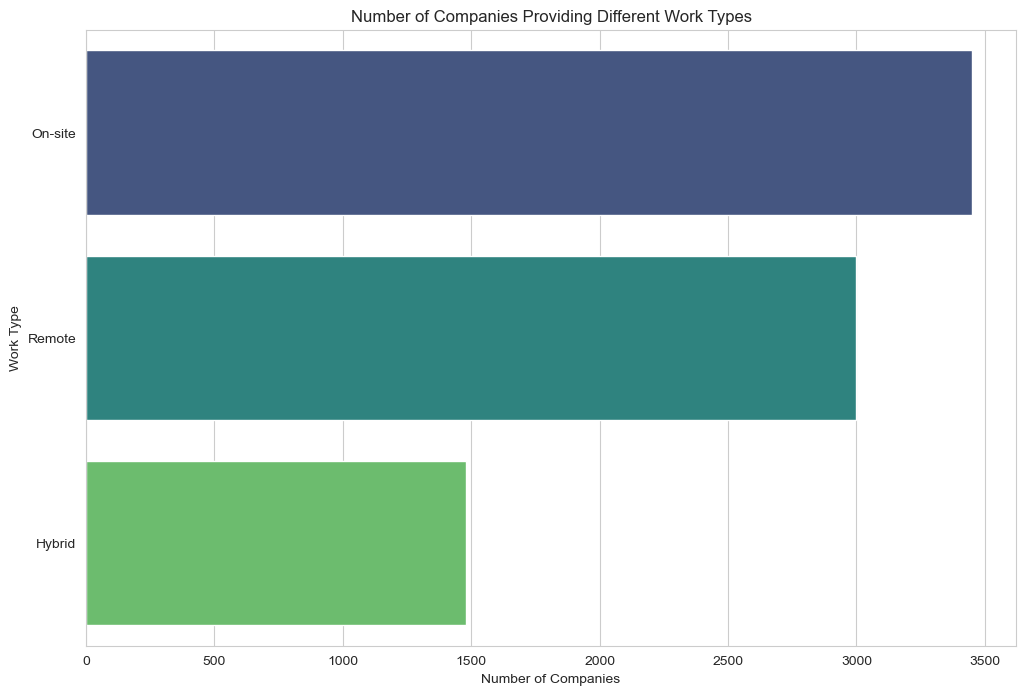

In [65]:
work_type_counts = df['work_type'].value_counts().reset_index()
work_type_counts.columns = ['work_type', 'company_count']

plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(data=work_type_counts, x='company_count', y='work_type', palette='viridis')

plt.title('Number of Companies Providing Different Work Types')
plt.xlabel('Number of Companies')
plt.ylabel('Work Type')
plt.show()


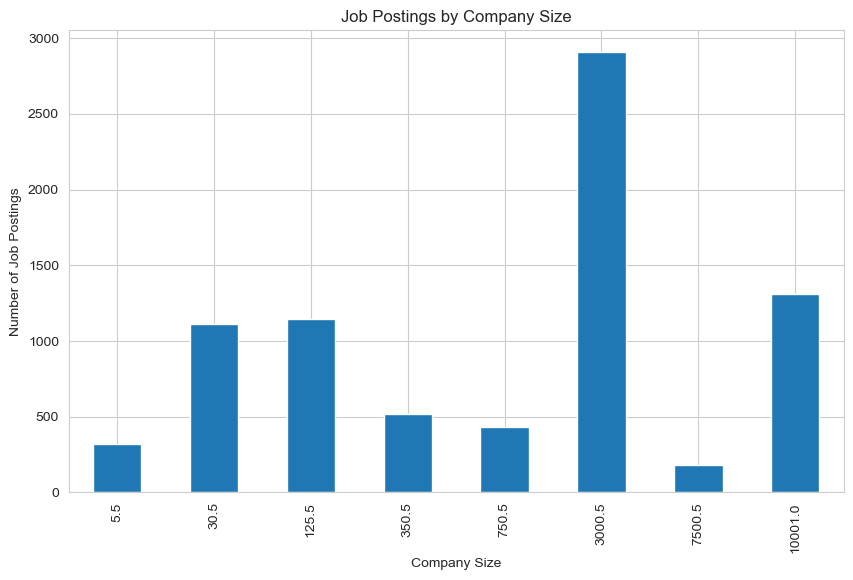

In [69]:
job_by_company_size = df.groupby('no_of_employ_numeric')['job_ID'].count()

job_by_company_size.plot(kind='bar', figsize=(10,6), title='Job Postings by Company Size')
plt.ylabel('Number of Job Postings')
plt.xlabel('Company Size')
plt.show()


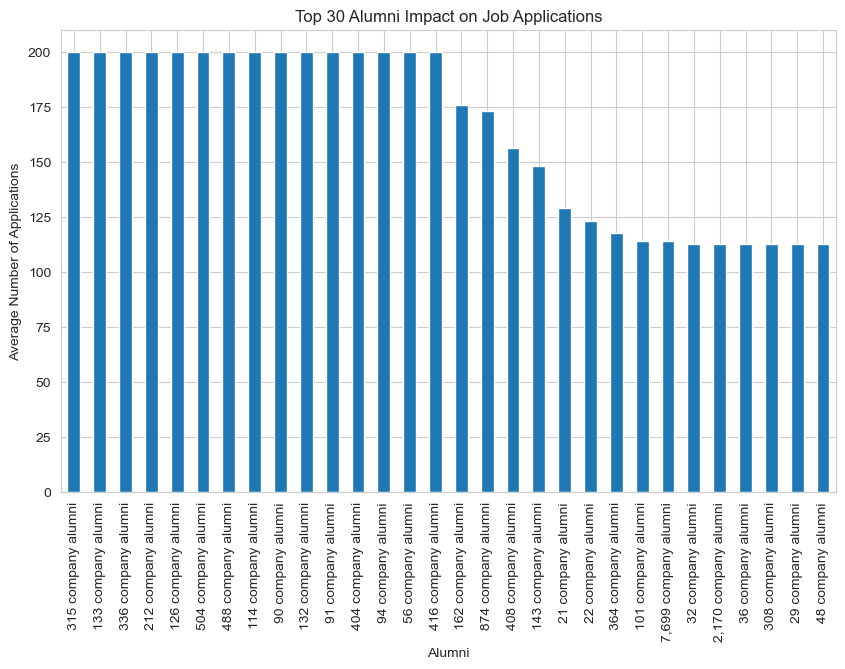

In [77]:
N = 30
alumni_impact = df.groupby('alumni')['no_of_application'].mean().sort_values(ascending=False).head(N)
alumni_impact.plot(kind='bar', figsize=(10,6), title=f'Top {N} Alumni Impact on Job Applications')
plt.ylabel('Average Number of Applications')
plt.xlabel('Alumni')
plt.show()
